In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def transit_depth(planet_radius,star_radius):
    depth =(planet_radius/star_radius)**2*100
    return depth

R_sun = 696000  
R_earth = 6371
R_jupiter = 71492 
R_neptune = 24764  
print("Transit Depth Calclations")
print("="*50)
planets={
    "Jupiter":R_jupiter,
    "Neptune":R_neptune,
    "Earth":R_earth
}
for name,radius in planets.items():
    depth=transit_depth(radius,R_sun)
    print(f"{name}:{depth:.4f}% brightness drop")
    print(f"(1 part in {int(100/depth)})")
    print()

print("Kepler can detect 0.01% brightness changes")

#All are in km

Transit Depth Calclations
Jupiter:1.0551% brightness drop
(1 part in 94)

Neptune:0.1266% brightness drop
(1 part in 789)

Earth:0.0084% brightness drop
(1 part in 11934)

Kepler can detect 0.01% brightness changes


In [26]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

# Define targets
targets = {
    'exoplanet_host': 'Kepler-10',           # Known planet
    'eclipsing_binary': 'KIC 2161623',       # EB example
    'variable_star': 'KIC 3733346',          # RR Lyrae
    'quiet_star': 'KIC 11904151',            # Quiet main sequence
    'tabbys_star': 'KIC 8462852'             # Famous anomaly
}

# Download each
light_curves = {}

for name, kic in targets.items():
    print(f"Downloading {name} ({kic})...")
    
    try:
        search_result = lk.search_lightcurve(kic, author='Kepler', cadence='long')
        
        if len(search_result) > 0:
            
            lc = search_result[0].download()
            light_curves[name] = lc
            print(f"  ✓ Downloaded {len(lc.time)} points")
        else:
            print(f"  ✗ No data found")
    
    except Exception as e:
        print(f"  ✗ Error: {e}")

print(f"\n✓ Downloaded {len(light_curves)} light curves")

import os

os.makedirs('data/raw/day2', exist_ok=True)

for name, lc in light_curves.items():
    filename = f"data/raw/day2/{name}.fits"
    lc.to_fits(filename, overwrite=True)
    print(f"✓ Saved {filename}")


print("✓ Saved to data/raw/day2_example_lightcurves.pkl")

  ✓ Downloaded 473 points
  ✓ Downloaded 4344 points
  ✓ Downloaded 1626 points
  ✓ Downloaded 473 points
  ✓ Downloaded 473 points

✓ Downloaded 5 light curves
✓ Saved data/raw/day2/exoplanet_host.fits
✓ Saved data/raw/day2/eclipsing_binary.fits
✓ Saved data/raw/day2/variable_star.fits
✓ Saved data/raw/day2/quiet_star.fits
✓ Saved data/raw/day2/tabbys_star.fits
✓ Saved to data/raw/day2_example_lightcurves.pkl


In [28]:
import pickle

✓ Loaded eclipsing_binary (4344 points)
✓ Loaded exoplanet_host (473 points)
✓ Loaded quiet_star (473 points)
✓ Loaded tabbys_star (473 points)
✓ Loaded variable_star (1626 points)


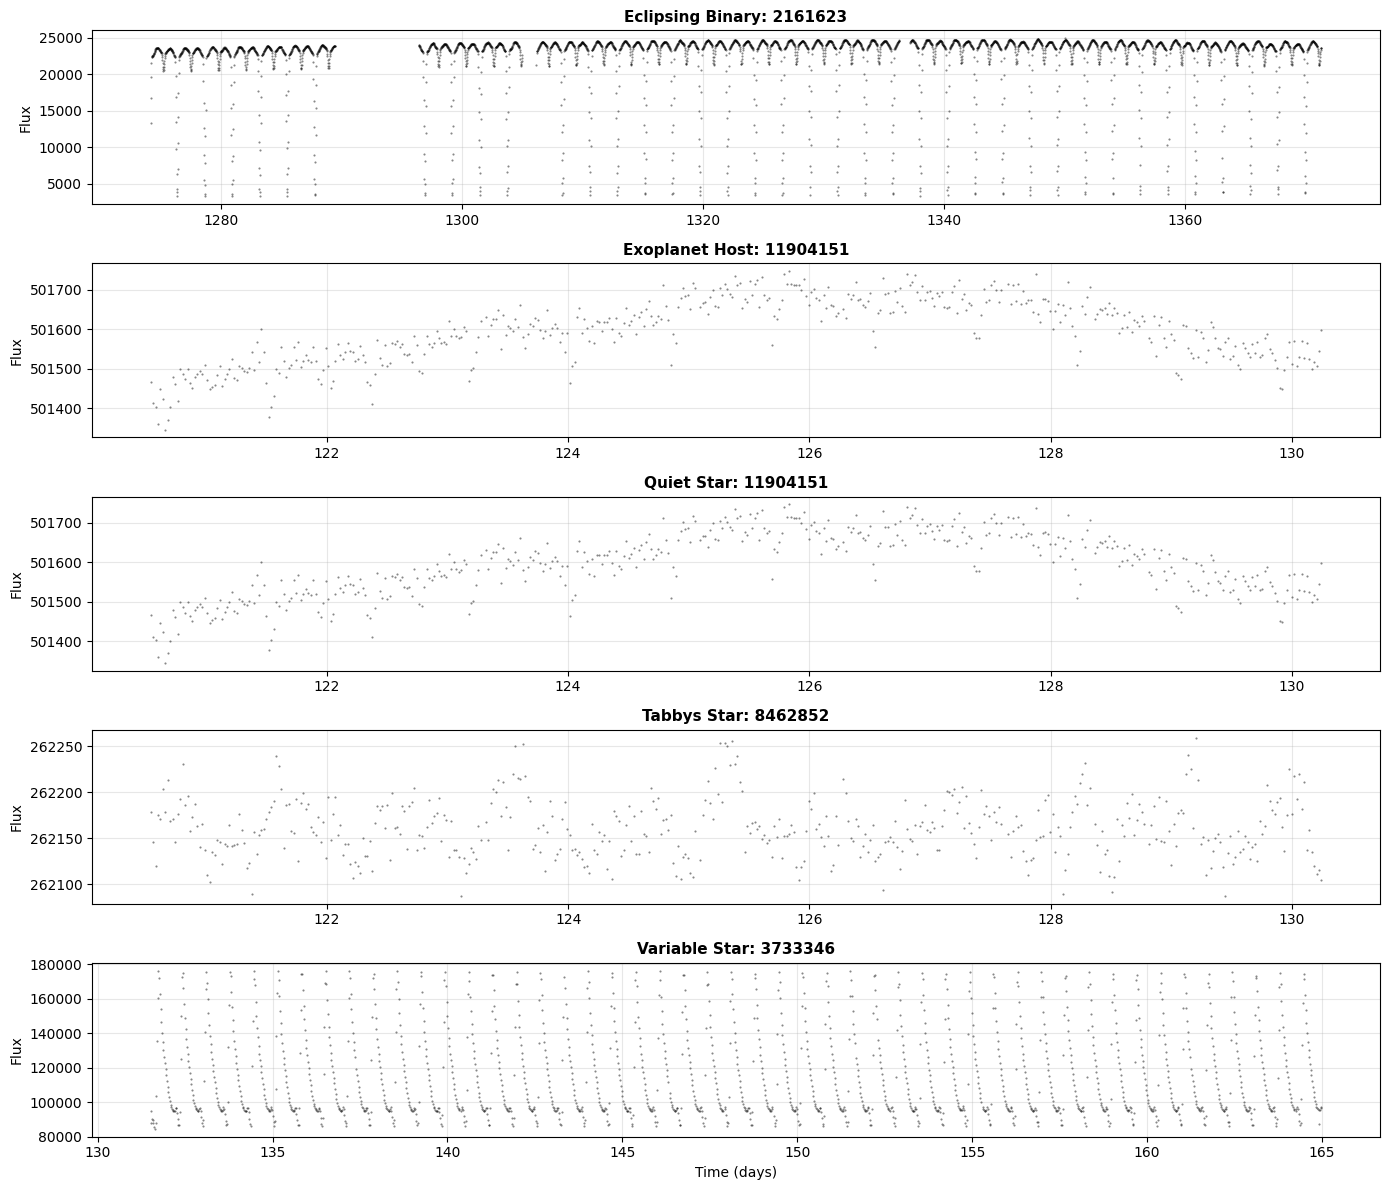

✓ Comparison gallery saved correctly 


In [33]:
import lightkurve as lk
import matplotlib.pyplot as plt
import os

# Directory containing FITS files
data_dir = "data/raw/day2"

# Load all FITS light curves
light_curves = {}

for filename in sorted(os.listdir(data_dir)):
    if filename.endswith(".fits"):
        name = filename.replace(".fits", "")
        path = os.path.join(data_dir, filename)
        
        lc = lk.read(path)
        light_curves[name] = lc
        
        print(f"✓ Loaded {name} ({len(lc.time)} points)")

# Create comparison figure
fig, axes = plt.subplots(len(light_curves), 1, figsize=(14, 12))

for idx, (name, lc) in enumerate(light_curves.items()):
    ax = axes[idx]
    
    ax.plot(
        lc.time.value,
        lc.flux.value,
        "k.",
        markersize=1,
        alpha=0.5
    )
    
    ax.set_ylabel("Flux", fontsize=10)
    ax.set_title(
        f"{name.replace('_', ' ').title()}: {lc.targetid}",
        fontsize=11,
        fontweight="bold"
    )
    ax.grid(alpha=0.3)
    
    if idx == len(light_curves) - 1:
        ax.set_xlabel("Time (days)", fontsize=10)

plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig(
    "figures/day2_comparison_gallery.png",
    dpi=200,
    bbox_inches="tight"
)

plt.show()

print("✓ Comparison gallery saved correctly ")
